# Conditions of linear regression

* **Linearity:** The relationship between X and the mean of Y is linear.
* **Homoscedasticity:** The variance of residual is the same for any value of X.
* **Independence:** Observations are independent of each other.
* **Normality:** For any fixed value of X, Y is normally distributed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy import stats
# import seaborn as sns
# import statsmodels.api as sm
# from sklearn import linear_model

In [2]:
# Load the data into a pandas dataframe
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


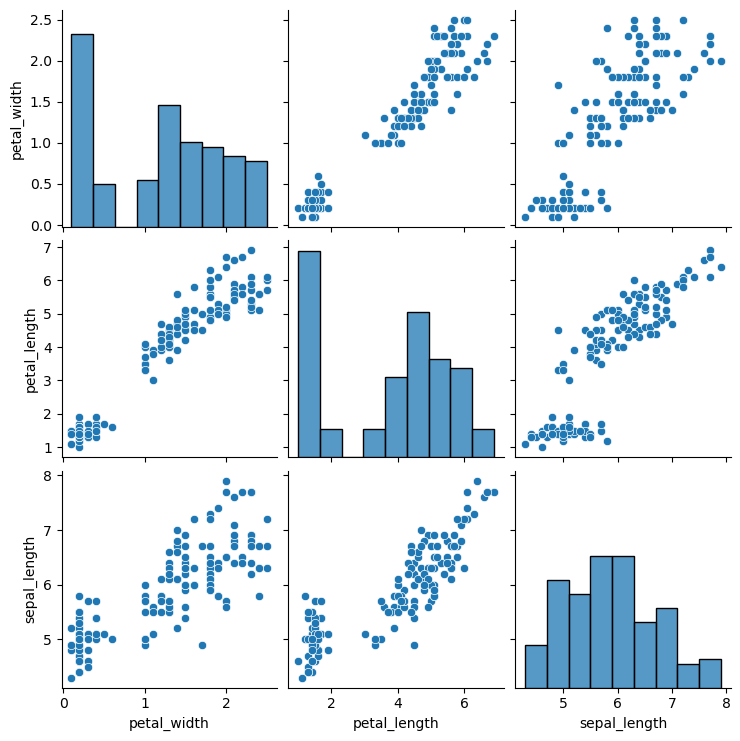

In [3]:
# Linear relationship between Y and Xs
sns.pairplot(iris[['petal_width', 'petal_length', 'sepal_length']].dropna(how='any', axis=0))

In [4]:
# Multiple Linear regression
X = iris[["petal_length", "sepal_length"]]

# Stats Models:
X = sm.add_constant(X)  # another way to add a constant row for an intercept
y = iris["petal_width"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     962.1
Date:                Tue, 02 May 2023   Prob (F-statistic):           3.60e-85
Time:                        10:17:41   Log-Likelihood:                 26.792
No. Observations:                 150   AIC:                            -47.58
Df Residuals:                     147   BIC:                            -38.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0090      0.182     -0.049   

# JB test: test for normal distribution of residuals

H0: The null hypothesis for the test is that the data are normally distributed (in this case residuals)

Unfortunately, with small samples the Jarque-Bera test is prone rejecting the null hypothesis–

that the distribution is normal–when it is in fact true


In [5]:
res = results.resid  # obtain residuals

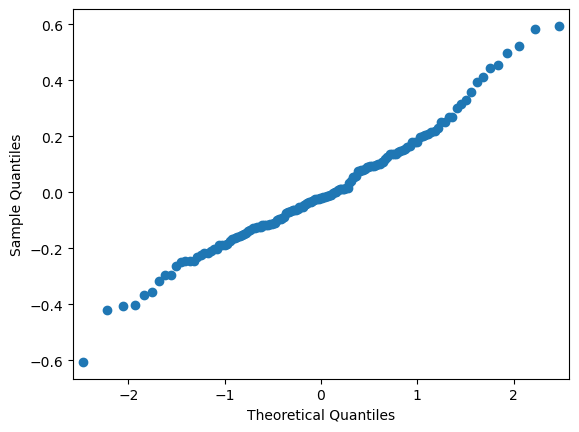

In [6]:
sm.qqplot(res)  # check the normality of residuals using the qq plot
plt.show()

# Durbin-watson: used for measuring autocorrelation

Approximately equal to 2(1-r), where r is the sample autocorrelation.

ranges from zero to four, and a value around two suggests that there is no autocorrelation.

Values greater than two suggest negative correlation, and values less that one suggest positive correlation.

# Multicollinearity

condition no.: used for measuring multi-collinearity

cond no>30 means multi-collinearity

influences the stability & reliability of coefficients

In [7]:
corr = X.corr()  # correlation bw predictors
print(corr)

              const  petal_length  sepal_length
const           NaN           NaN           NaN
petal_length    NaN      1.000000      0.871754
sepal_length    NaN      0.871754      1.000000


# heteroscedasticity

Test whether the variance of the errors from a regression is dependent on the values of the independent variables.

There should (be) relation or pattern between residuals and fitted values, i.e. we want homoscedasticity.  (Like homoeostatic?)

### breusch-pagan test

h0: null hypothesis of the Breusch-Pagan test is homoscedasticity (= variance does not depend on auxiliary regressors)

In [8]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [9]:
# name = ['Lagrange multiplier statistic', 'p-value',
#         'f-value', 'f p-value']
# test = sms.het_breushpagan(results.resid, results.model.exog)  # ERROR.
# lzip(name, test)
# TODO: module 'statsmodels.stats.api' has no attribute 'het_breushpagan'

Reject the null hypothesis that the variance of the residuals is constant and infer that heteroscedasticity is indeed present.

# Influence Test

Plot helps us find influential cases (i.e., subjects) if any. Not all outliers are influential in linear regression analysis.

Outlying values in the upper right corner or in the lower right corner.

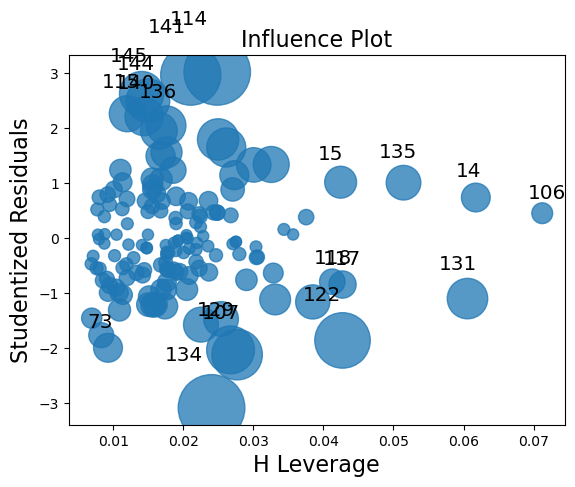

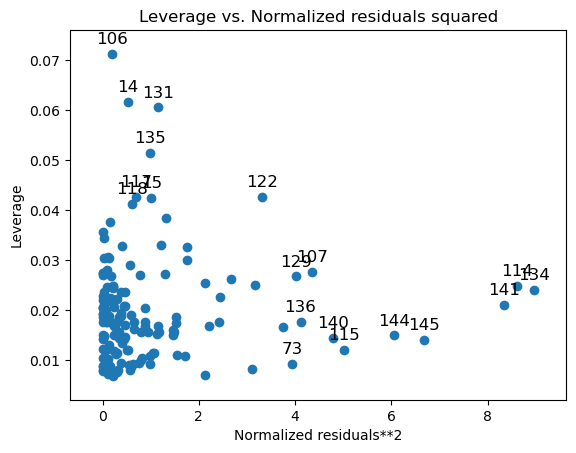

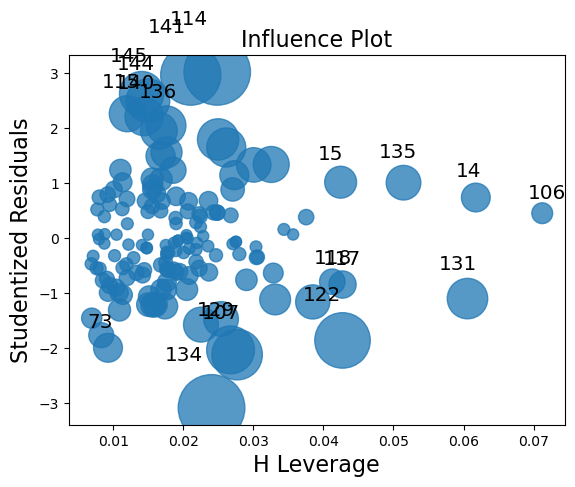

In [10]:
from statsmodels.graphics.regressionplots import *

plot_leverage_resid2(results)
influence_plot(results)
